<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#exploring_the_data">Data Exploration</a></li>
        <li><a href="#cleaning_the_data">Data Cleaning</a></li>
        <li><a href="#transforming_the_data">Data Transformation</a></li>
        <li><a href="#using_parameteric_and_non_parametric_models">Modeling</a></li>
        <li><a href="#recommendations">Recommendation</a></li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas (as pd)</b> </li>
    <li> <b>pandas_profiling</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>seaborn (as sns)</b> </li> 
    <li> <b>warnings</b> </li> 
    <li> <b>os</b> </li>
    <li> <b>series, DataFrame</b> from <b>pandas</b> </li>
    <li> <b>stats</b> from <b>scipy.stats</b> </li>
    <li> <b>train_test_split</b> from <b>sklearn.model_selection</b> </li>
    <li> <b>LinearRegression</b> from <b>sklearn.linear_model</b> </li>
    <li> <b>r2_score</b> from <b>sklearn.metrics</b> </li>
    <li> <b>statsmodels.api (as sm)</b> </li>
    <li> <b>KNeighborsRegressor</b> from <b>sklearn.neighbors</b> </li>
    <li> <b>mean_squared_error</b> from <b>sklearn.metrics</b> </li>
    <li> <b>neighbors</b> from <b>sklearn</b> </li>
    <li> <b>sqrt</b> from <b>math</b> </li>
    <li> <b>RandomForestRegressor</b> from <b>sklearn.ensemble</b> </li>
</ul>

In [2]:
import pandas as pd 
import pandas_profiling
from pandas import Series, DataFrame
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor 

<div id="about_dataset">
    <h2>1. About the dataset</h2>
    The dataset is imdb_data_v2 which is in csv file. It contains 38 variables for 5787 movies, spanning across more than 100 years in 65 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the traget/response variable while the other 37 variables are possible predictors.
</div>

<div id="exploring_the_data">
     <h2>2. Data Exploration</h2>
</div>

<li><b>2.1. Data Load</b></li>

In [3]:
print(os.listdir("C:\Data Science_Interview\Dataset"))

['Data Scientist imdb_data_v2.csv']



We read in the data we've saved, passing the column names

In [4]:
df = pd.read_csv('C:\Data Science_Interview\Dataset\Data Scientist imdb_data_v2.csv')

In [5]:
print('Training data shape: ', df.shape)

Training data shape:  (5787, 38)



Let's check out the first few rows of data

In [6]:
df.head()

,id,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,priority,longest_facebook_comment_review_char,color,director_name,num_critic_for_reviews,...,country,content_rating,website_score,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,1,1102,67,18,1181,4,250,Color,James Cameron,723.0,...,USA,PG-13,7.9,237000000.0,236999000,2009.0,936.0,1.78,33000,7.9
1,2,1117,70,18,1196,4,740,Color,Gore Verbinski,302.0,...,USA,PG-13,7.1,300000000.0,299999000,2007.0,5000.0,2.35,0,7.1
2,3,1000,90,11,1125,4,1779,Color,Sam Mendes,602.0,...,UK,PG-13,6.8,245000000.0,244999000,2015.0,393.0,2.35,85000,6.8
3,4,1007,35,10,1127,4,1074,Color,Christopher Nolan,813.0,...,USA,PG-13,8.5,250000000.0,249999000,2012.0,23000.0,2.35,164000,8.5
4,5,1128,85,20,1072,4,813,NaN,Doug Walker,NaN,...,NaN,NaN,7.1,NaN,-1000,NaN,12.0,NaN,0,7.1


### Data Profiling

In [7]:
df.profile_report()

We have 5787 observations of 38 variables in which 21 variables are numeric and 11 variables are categorical. The response variable “imdb_score” is numerical, and the predictors are mixed with numerical and categorical variables.

<li><b>2.2. Remove Duplicates</b></li>

In the IMDB dataset, There is 744 (12.9%) duplicate rows. I want to remove the 744 duplicated rows and keep the unique ones.

In [8]:
df1 = df

In [9]:
#drop the duplicates
df1.drop_duplicates(inplace=True)
# Check if done
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 38 columns):
id                                      5043 non-null int64
stock_market_idx                        5043 non-null int64
days_since_last_tweet                   5043 non-null int64
pre_screen_viewers                      5043 non-null int64
characters_per_longest_review           5043 non-null int64
priority                                5043 non-null int64
longest_facebook_comment_review_char    5043 non-null int64
color                                   5024 non-null object
director_name                           4939 non-null object
num_critic_for_reviews                  4993 non-null float64
duration                                5028 non-null float64
director_facebook_likes                 4939 non-null float64
actor_3_facebook_likes                  5020 non-null float64
actor_2_name                            5030 non-null object
actor_1_facebook_likes                  50

<div id="cleaning_the_data">
     <h2>3. Data Cleaning</h2>
</div>

<li><b>3.1 Missing Values</b></li>



We can quickly check if we have any null values in our data

In [10]:
def mis_values(df1):
    mis_value = df1.isnull().sum() 
    mis_value_per = 100 * df1.isnull().sum() / len(df1)
    mis_value_column = pd.concat([mis_value, mis_value_per], axis=1)
    mis_val_tab_rename_cols = mis_value_column.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values'})
    mis_val_tab_rename_cols = mis_val_tab_rename_cols[mis_val_tab_rename_cols.iloc[:,1] != 0].sort_values('% of Total Missing Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"  
           
           "There are " + str(mis_val_tab_rename_cols.shape[0]) +
           " cols that have missing values.")
    return mis_val_tab_rename_cols     

In [11]:
missing_values = mis_values(df1)

Your selected dataframe has 38 columns.
There are 21 cols that have missing values.


In [12]:
print(missing_values)

                         Missing Values  % of Total Missing Values
gross                               884                       17.5
budget                              492                        9.8
aspect_ratio                        329                        6.5
content_rating                      303                        6.0
plot_keywords                       153                        3.0
title_year                          108                        2.1
director_name                       104                        2.1
director_facebook_likes             104                        2.1
num_critic_for_reviews               50                        1.0
actor_3_name                         23                        0.5
actor_3_facebook_likes               23                        0.5
num_user_for_reviews                 21                        0.4
color                                19                        0.4
duration                             15                       

Instead of dropping the rows, I used the median imputation because it's maintain the distribution of the variable. 

In [13]:
# fill missing values with median column values
df1 = df1.fillna(df1.median())

In [14]:
df1

,id,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,priority,longest_facebook_comment_review_char,color,director_name,num_critic_for_reviews,...,country,content_rating,website_score,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,1,1102,67,18,1181,4,250,Color,James Cameron,723.0,...,USA,PG-13,7.9,237000000.0,236999000,2009.0,936.0,1.78,33000,7.9
1,2,1117,70,18,1196,4,740,Color,Gore Verbinski,302.0,...,USA,PG-13,7.1,300000000.0,299999000,2007.0,5000.0,2.35,0,7.1
2,3,1000,90,11,1125,4,1779,Color,Sam Mendes,602.0,...,UK,PG-13,6.8,245000000.0,244999000,2015.0,393.0,2.35,85000,6.8
3,4,1007,35,10,1127,4,1074,Color,Christopher Nolan,813.0,...,USA,PG-13,8.5,250000000.0,249999000,2012.0,23000.0,2.35,164000,8.5
4,5,1128,85,20,1072,4,813,NaN,Doug Walker,110.0,...,NaN,NaN,7.1,20000000.0,-1000,2005.0,12.0,2.35,0,7.1
5,6,1037,75,20,1121,4,508,Color,Andrew Stanton,462.0,...,USA,PG-13,6.6,263700000.0,263699000,2012.0,632.0,2.35,24000,6.6
6,7,1021,80,12,1129,4,1189,Color,Sam Raimi,392.0,...,USA,PG-13,6.2,258000000.0,257999000,2007.0,11000.0,2.35,0,6.2
7,8,1133,30,16,1164,4,842,Color,Nathan Greno,324.0,...,USA,PG,7.8,260000000.0,259999000,2010.0,553.0,1.85,29000,7.8
8,9,1186,14,11,1076,4,1860,Color,Joss Whedon,635.0,...,USA,PG-13,7.5,250000000.0,249999000,2015.0,21000.0,2.35,118000,7.5
9,10,1016,3,10,1040,4,832,Color,David Yates,375.0,...,UK,PG,7.5,250000000.0,249999000,2009.0,11000.0,2.35,10000,7.5


In [15]:
df1.dtypes.value_counts()

float64    15
object     12
int64      11
dtype: int64



We do! Let's use the "describe" method to find them, amongst other interesting information

In [16]:
df1.describe()

,id,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,priority,longest_facebook_comment_review_char,num_critic_for_reviews,duration,director_facebook_likes,...,facenumber_in_poster,num_user_for_reviews,website_score,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
count,5043.000000,5043.00000,5043.000000,5043.000000,5043.000000,5043.0,5043.000000,5043.000000,5043.000000,5043.000000,...,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,2522.000000,1101.16042,49.908190,14.979576,1100.040849,4.0,962.646242,139.894904,107.188578,673.362086,...,1.370216,272.284553,6.559925,3.782554e+07,3.587332e+07,2002.531033,1649.030339,2.228858,7525.964505,6.559925
std,1455.933034,58.48476,28.432368,3.163246,57.299452,0.0,541.710282,121.034214,25.160972,2785.636586,...,2.011066,377.269873,8.433695,1.958882e+08,1.961555e+08,12.359307,4037.579765,1.339542,19320.445110,8.433695
min,1.000000,1000.00000,1.000000,10.000000,1000.000000,4.0,6.000000,1.000000,7.000000,0.000000,...,0.000000,1.000000,1.600000,2.180000e+02,-1.000000e+03,1916.000000,0.000000,1.180000,0.000000,1.600000
25%,1261.500000,1051.00000,26.000000,12.000000,1051.000000,4.0,511.000000,50.000000,93.000000,7.000000,...,0.000000,65.000000,5.800000,7.000000e+06,2.999000e+06,1999.000000,281.000000,1.850000,0.000000,5.800000
50%,2522.000000,1101.00000,49.000000,15.000000,1099.000000,4.0,962.000000,110.000000,103.000000,49.000000,...,1.000000,156.000000,6.600000,2.000000e+07,1.499900e+07,2005.000000,595.000000,2.350000,166.000000,6.600000
75%,3782.500000,1153.00000,74.000000,18.000000,1149.000000,4.0,1424.000000,194.000000,118.000000,189.000000,...,2.000000,324.000000,7.200000,4.000000e+07,3.999900e+07,2011.000000,918.000000,2.350000,3000.000000,7.200000
max,5043.000000,1200.00000,99.000000,20.000000,1200.000000,4.0,1900.000000,813.000000,511.000000,23000.000000,...,43.000000,5060.000000,600.000000,1.221550e+10,1.221550e+10,2045.000000,137000.000000,16.000000,349000.000000,600.000000


I dropped the columns because these columns had high cardinality or many levels and also many zero values.

In [17]:
# Drop extraneous columns
col = ['id', 'priority', 'director_name', 'actor_2_name', 'color', 'actor_1_name', 'actor_3_name', 'country', 
       'director_name', 'facenumber_in_poster', 'movie_facebook_likes', 'website_score', 'weighted_budget', 
       'movie_imdb_link', 'content_rating', 'language', 'plot_keywords', 'cast_total_facebook_likes', 
       'director_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'movie_title', 'title_year', 
       'aspect_ratio', 'website_score', 'genres', 'actor_1_facebook_likes']
df1.drop(col, axis=1, inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 13 columns):
stock_market_idx                        5043 non-null int64
days_since_last_tweet                   5043 non-null int64
pre_screen_viewers                      5043 non-null int64
characters_per_longest_review           5043 non-null int64
longest_facebook_comment_review_char    5043 non-null int64
num_critic_for_reviews                  5043 non-null float64
duration                                5043 non-null float64
gross                                   5043 non-null float64
num_voted_users                         5043 non-null int64
made_up_column                          5043 non-null float64
num_user_for_reviews                    5043 non-null float64
budget                                  5043 non-null float64
imdb_score                              5043 non-null float64
dtypes: float64(7), int64(6)
memory usage: 551.6 KB


<div id="transforming_the_data">
     <h2>4. Data Transformation</h2>
</div>

To normalize the above variables, I used log transformation.

In [19]:
df1['budget'] = np.log(df1.budget)
df1['imdb_score'] = np.log(df1.imdb_score)
df1['made_up_column'] = np.log(df1.imdb_score)
df1['stock_market_idx'] = np.log(df1.stock_market_idx)
df1['days_since_last_tweet'] = np.log(df1.days_since_last_tweet)
df1['pre_screen_viewers'] = np.log(df1.pre_screen_viewers)
df1['characters_per_longest_review'] = np.log(df1.characters_per_longest_review)
df1['longest_facebook_comment_review_char'] = np.log(df1.longest_facebook_comment_review_char)
df1['num_critic_for_reviews'] = np.log(df1.num_critic_for_reviews)
df1['duration'] = np.log(df1.duration)
df1['gross'] = np.log(df1.gross)
df1['num_voted_users'] = np.log(df1.num_voted_users)
df1['num_user_for_reviews'] = np.log(df1.num_user_for_reviews)

In [20]:
df1.describe()

,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,longest_facebook_comment_review_char,num_critic_for_reviews,duration,gross,num_voted_users,made_up_column,num_user_for_reviews,budget,imdb_score
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,7.002705,3.630552,2.683450,7.001743,6.583890,4.467420,4.647760,16.501699,10.096277,0.605564,4.871133,16.478166,1.845742
std,0.053234,0.913946,0.218117,0.052173,0.944422,1.163810,0.242031,2.125449,1.990129,0.126912,1.392721,1.635744,0.210021
min,6.907755,0.000000,2.302585,6.907755,1.791759,0.000000,1.945910,5.087596,1.609438,-0.755015,0.000000,5.384495,0.470004
25%,6.957497,3.258097,2.484907,6.957497,6.236370,3.912023,4.532599,15.950977,9.058761,0.564096,4.174387,15.761421,1.757858
50%,7.003974,3.891820,2.708050,7.002156,6.869014,4.700480,4.634729,17.054875,10.444619,0.635025,5.049856,16.811243,1.887070
75%,7.050123,4.304065,2.890372,7.046647,7.261225,5.267858,4.770685,17.754313,11.475317,0.680103,5.780744,17.504390,1.974081
max,7.090077,4.595120,2.995732,7.090077,7.549609,6.700731,6.236370,20.449494,14.340099,1.855818,8.529122,23.225971,6.396930


In [21]:
df1.profile_report()












Some of the columns have missing values. We can deal with this in a few different ways. The simpliest solution is to remove them, though we lose many examples in doing so. Alternatively, we could impute the values, replacing the NaN values with an average (mean or median). 

For the purpose of this simple notebook, the variable num_user_for_reviews has 51 zeros which was replaced by median and also remaining numerical variable are imputed by median imputation.

In [22]:
nonzero_median = df1[ df1.num_user_for_reviews != 0 ].median()

In [23]:
df1.loc[ df1.num_user_for_reviews == 0, "num_user_for_reviews" ] = nonzero_median

In [24]:
# fill missing values with median column values
df1 = df1.fillna(df1.median())

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 13 columns):
stock_market_idx                        5043 non-null float64
days_since_last_tweet                   5043 non-null float64
pre_screen_viewers                      5043 non-null float64
characters_per_longest_review           5043 non-null float64
longest_facebook_comment_review_char    5043 non-null float64
num_critic_for_reviews                  5043 non-null float64
duration                                5043 non-null float64
gross                                   5043 non-null float64
num_voted_users                         5043 non-null float64
made_up_column                          5043 non-null float64
num_user_for_reviews                    5043 non-null float64
budget                                  5043 non-null float64
imdb_score                              5043 non-null float64
dtypes: float64(13)
memory usage: 551.6 KB


<div id="using_parameteric_and_non_parametric_models">
     <h2>5. Data Modeling</h2>
</div>

 <li><b>5.1. Data Splitting</b></li>

### Test & Train Split

The purpose of splitting the data is to be able to assess the quality of a predictive model when it is used on unseen data. When training, you will try to build a model that fits to the data as closely as possible, to be able to most accurately make a prediction. However, without a test set you run the risk of overfitting - the model works very well for the data it has seen but not for new data.

The split ratio is often debated and in practice you might split your data into three sets: train, validation and test. You would use the training data to understand which classifier you wish to use; the validation set to test on whilst tweaking parameters; and the test set to get an understanding of how your final model would work in practice. Furthermore, there are techniques such as K-Fold cross validation that also help to reduce bias.

For the purpose of this demonstration, we will only be randomly splitting our data into test and train, with a 80/20 split.

We import the required library from scikit-learn, train_test_split

In [26]:
X = df1.iloc[:,0:12].values
y = df1.iloc[:,12:13].values

In [27]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.20, random_state=3)

In [28]:
print(X_trainset.shape)
print(y_trainset.shape)

(4034, 12)
(4034, 1)


In [29]:
print(X_testset.shape)
print(y_testset.shape)

(1009, 12)
(1009, 1)


<div id="using_parametric_and_non_parametric_models">
     <h2> Parametric Machine Learning Algorithm</h2>
</div>

<li><b>5.2. Using Linear Regression</b></li>

Linear regression attempts to fit a straight hyperplane to your dataset that is closest to all data points. It is most suitable when there are linear relationships between the variables in the dataset.

In [30]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
y_pred1 = reg.predict(X_testset)  

<li><b>5.2.1. Performance Metrics of Linear Regression</b></li>

We wish to understand how good our model is; there are a few different metrics we can use. We will evaluate mean squared error (MSE) and mean absolute error (MAE)

We import scikit-learn's mean squared error and sckit-learn's mean absolute error

In [32]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testset, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testset, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testset, y_pred1)))  

Mean Absolute Error: 0.01813151995508253
Mean Squared Error: 0.0014731432685910185
Root Mean Squared Error: 0.03838154854342147


<li><b>5.3. Using Ridge Regression </b></li>

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [34]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='mean_squared_error')

ridge_regressor.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [35]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-0.00248930108763342


In this case, the optimal value for alpha is 1, and the negative MSE is -0.0024893.

<li><b>5.4. Using LASSO Regression </b></li>

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='mean_squared_error')

lasso_regressor.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [38]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-0.0024895672740462694


In this case, the optimal value for alpha is 0.0001, and the negative MSE is -0.0024895.


Note:
After use linear, lasso, and ridge regression. We have seen that ridge is the best fitting method, with a regularization value of 1.

<div id="using_parameteric_and_non_parametric_models">
     <h2>Nonparametric ML Algorithms</h2>
</div>

<li><b>5.5. Using KNRegressor </b></li>

In [39]:
clf=KNeighborsRegressor(5)
clf.fit(X_trainset,y_trainset)
y_pred=clf.predict(X_testset)
print(mean_squared_error(y_testset,y_pred))

0.031100714262353453


In [42]:
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_trainset, y_trainset)  #fit the model
    pred=model.predict(X_testset) #make prediction on test set
    error = sqrt(mean_squared_error(y_testset,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.21315240080835277
RMSE value for k=  2 is: 0.1908013268343305
RMSE value for k=  3 is: 0.18098856364713534
RMSE value for k=  4 is: 0.17803795746340828
RMSE value for k=  5 is: 0.17635394597896994
RMSE value for k=  6 is: 0.17416175135818351
RMSE value for k=  7 is: 0.1731860406522612
RMSE value for k=  8 is: 0.17230452241536612
RMSE value for k=  9 is: 0.17302494104578212
RMSE value for k=  10 is: 0.17256339138196394
RMSE value for k=  11 is: 0.17266004948251795
RMSE value for k=  12 is: 0.1728858069932387
RMSE value for k=  13 is: 0.17274587714990983
RMSE value for k=  14 is: 0.1730896798547398
RMSE value for k=  15 is: 0.17308010745515268
RMSE value for k=  16 is: 0.1730563602443598
RMSE value for k=  17 is: 0.17335005398973438
RMSE value for k=  18 is: 0.17323566744883404
RMSE value for k=  19 is: 0.1736963168112529
RMSE value for k=  20 is: 0.17340505276908819


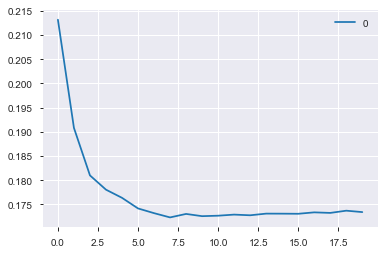

In [43]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Comparing with other Number of clusters, k=8 and RMSE is 0.172 is better. 

<li><b>5.6. Using of Random Forest</b></li>


In [44]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_trainset, y_trainset)  
y_pred = regressor.predict(X_testset)  

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testset, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testset, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testset, y_pred))) 

Mean Absolute Error: 0.00044979607149377013
Mean Squared Error: 4.4625280188515924e-05
Root Mean Squared Error: 0.006680215579494117


When estimator is 20 then RMSE is 0.007 and MSE is 4.46.

Note:

After comparing non-parametric models RMSE, Random forest performed better.

### Stepwise Selection

Used backward selection method for multiple regression to find better R-square and all p-value of variable should be significantly significant (less than 0.05)

In [46]:
X = np.column_stack((df1['budget'], df1['stock_market_idx'], df1['days_since_last_tweet'], df1['pre_screen_viewers'],
                     df1['characters_per_longest_review'], df1['longest_facebook_comment_review_char'], 
                     df1['num_critic_for_reviews'], df1['duration'], df1['gross'], df1['num_voted_users'], 
                     df1['made_up_column'], df1['num_user_for_reviews']))
y = df1['imdb_score']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     7691.
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:39:57   Log-Likelihood:                 8184.7
No. Observations:                5043   AIC:                        -1.634e+04
Df Residuals:                    5030   BIC:                        -1.626e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0315      0.129      7.993      0.0

In [47]:
col = ['pre_screen_viewers']
df1.drop(col, axis=1, inplace=True)

In [48]:
X = np.column_stack((df1['budget'], df1['stock_market_idx'], df1['days_since_last_tweet'], 
                     df1['characters_per_longest_review'], df1['longest_facebook_comment_review_char'], 
                     df1['num_critic_for_reviews'], df1['duration'], df1['gross'], df1['num_voted_users'], 
                     df1['made_up_column'], df1['num_user_for_reviews']))
y = df1['imdb_score']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     8391.
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:39:59   Log-Likelihood:                 8184.7
No. Observations:                5043   AIC:                        -1.635e+04
Df Residuals:                    5031   BIC:                        -1.627e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0307      0.129      8.001      0.0

In [49]:
col = ['gross']
df1.drop(col, axis=1, inplace=True)

In [50]:
X = np.column_stack((df1['budget'], df1['stock_market_idx'], df1['days_since_last_tweet'], 
                     df1['characters_per_longest_review'], df1['longest_facebook_comment_review_char'], 
                     df1['num_critic_for_reviews'], df1['duration'], df1['num_voted_users'], 
                     df1['made_up_column'], df1['num_user_for_reviews']))
y = df1['imdb_score']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     9232.
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:40:00   Log-Likelihood:                 8184.7
No. Observations:                5043   AIC:                        -1.635e+04
Df Residuals:                    5032   BIC:                        -1.628e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0306      0.129      8.002      0.0

In [51]:
col = ['days_since_last_tweet']
df1.drop(col, axis=1, inplace=True)

In [52]:
X = np.column_stack((df1['budget'], df1['stock_market_idx'], 
                     df1['characters_per_longest_review'], df1['longest_facebook_comment_review_char'], 
                     df1['num_critic_for_reviews'], df1['duration'], df['num_voted_users'], 
                     df1['made_up_column'], df1['num_user_for_reviews']))
y = df1['imdb_score']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:40:01   Log-Likelihood:                 8223.5
No. Observations:                5043   AIC:                        -1.643e+04
Df Residuals:                    5033   BIC:                        -1.636e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0974      0.128      8.583      0.0

In [53]:
col = ['stock_market_idx']
df1.drop(col, axis=1, inplace=True)

In [54]:
X = np.column_stack((df1['budget'], 
                     df1['characters_per_longest_review'], df1['longest_facebook_comment_review_char'], 
                     df1['num_critic_for_reviews'], df1['duration'], df1['num_voted_users'], 
                     df1['made_up_column'], df1['num_user_for_reviews']))
y = df1['imdb_score']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.154e+04
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:40:01   Log-Likelihood:                 8184.5
No. Observations:                5043   AIC:                        -1.635e+04
Df Residuals:                    5034   BIC:                        -1.629e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9687      0.091     10.589      0.0

In [55]:
col = ['characters_per_longest_review']
df1.drop(col, axis=1, inplace=True)

In [56]:
X = np.column_stack((df1['budget'], 
                     df1['longest_facebook_comment_review_char'], 
                     df1['num_critic_for_reviews'], df1['duration'], df1['num_voted_users'], 
                     df1['made_up_column'], df1['num_user_for_reviews']))
y = df1['imdb_score']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.319e+04
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:40:02   Log-Likelihood:                 8183.9
No. Observations:                5043   AIC:                        -1.635e+04
Df Residuals:                    5035   BIC:                        -1.630e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8740      0.015     59.630      0.0

In [57]:
col = ['longest_facebook_comment_review_char']
df1.drop(col, axis=1, inplace=True)

In [58]:
X = np.column_stack((df1['budget'], df1['num_critic_for_reviews'], df1['duration'], df1['num_voted_users'], 
                     df1['made_up_column'], df1['num_user_for_reviews']))
y = df1['imdb_score']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.539e+04
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:40:04   Log-Likelihood:                 8183.3
No. Observations:                5043   AIC:                        -1.635e+04
Df Residuals:                    5036   BIC:                        -1.631e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8689      0.014     62.356      0.0

Note: The target variable or dependent variable and independent variables were continuous. I used lof transformation to normalize the variables.
After verifing Linear Regression assumptions, I move forward with predictive modeling and got adjusted R-square of 95%.
After using backward selection technique, the remaining independent variables p-value is < 0.05 which shows that variables are significant. 
RMSE is also less which is 0.04.


After checking RMSE of the other algorithm, Random Forset root mean squared error is less which is 0.007. It shows that random forset perform better comparing with other models.

<div id="Modules">
     <h2> Modules</h2>
</div>

In [59]:
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<div id="df2">
     <h2>Creating new dataframe as df2</h2>
</div>

In [60]:
df2 = df

<div id="clean_and_transform">
    <h2> Clean & Transform</h2>
    The target variable is numeric and have duplicates. My goal is to build a model, which can help us predict if a movie is good or bad.So, I cleaned it and transformed it into levels: 1 means movie was good and 0 means movie was bad.
</div>

In [61]:
### data clean up/ transformation
# 1 = Good and 0 = when Bad
df2.loc[df.imdb_score < 8.0, 'imdb_score'] = 0
df2.loc[df.imdb_score >= 8.0, 'imdb_score'] = 1

In [62]:
df2.imdb_score.unique()

array([0., 1.])

Now, imdb_score is dichotomous now.

In [63]:
#create dummy variables
df2 = pd.get_dummies(df2, columns = ['color', 'director_name',
       'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name',
       'plot_keywords', 'language', 'country', 'content_rating'], drop_first = True)


Some of the columns have missing values. We can deal with this in a few different ways. The simpliest solution is to remove them, though we lose many examples in doing so. Alternatively, we could impute the values, replacing the NaN values with an average (mean or median). For the purpose of this simple notebook, we will simply remove them.

In [64]:
#drop columns
df2 = df2.drop(columns=['cast_total_facebook_likes', 'made_up_column', 'priority', 'website_score','weighted_budget',
                      'movie_imdb_link']).drop_duplicates()

In [65]:
def calculate_metrics(y_true,y_pred):
    print(precision_recall_fscore_support(y_true, y_pred,average='macro'))
    print(accuracy_score(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred,labels=[1,0]))

#df = pd.read_excel("../data/dataset_exercise.xlsx",header=0)
#df = df.drop("id",axis=1)
target = df2["imdb_score"]
df2_x = df2.drop("imdb_score",axis=1)

df2_x = df2_x.dropna(thresh=int(len(df2_x)*0.5), axis=1)
print(df2_x.shape)
df2_x = df2_x.fillna(df2_x.mean())

x = df2_x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
# stand = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2_x_pre = pd.DataFrame(x_scaled)

(5043, 21780)


In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df2_x_pre,target)
df2scores = pd.DataFrame(fit.scores_)
df2columns = pd.DataFrame(df2_x_pre.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([df2columns,df2scores],axis=1)
df2_x_backup = df2_x_pre.copy()

In [67]:
df2_x_pre = df2_x_backup.copy()
# df_new = 
conf_sum = 0 
index = 0
for i in df2scores.values:
    if i[0]<0.05:
        conf_sum+=i[0]
        df2_x_pre = df2_x_pre.drop(df2_x_pre.columns[index], axis=1)
        index-=1
    index+=1
    
df2_x_pre.shape

(5043, 21745)

<div id="splitting_data">
     <h2>2. Split Data on df2 dataset</h2>
</div>

In [68]:
x_train, x_test, y_train, y_test = train_test_split(df2_x_pre, target, test_size=0.20, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print("testing data=")
print("1=",np.sum(y_test))
print("0=",len(y_test)-np.sum(y_test))

(4034, 21745)
(1009, 21745)
(4034,)
(1009,)
testing data=
1= 72.0
0= 937.0


<div id="LogisticRegression">
     <h2> Logistic Regression</h2> (Parametric Model)
</div>

In [69]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0, solver='lbfgs').fit(x_train, y_train)
y_pred= clf1.predict(x_test)

calculate_metrics(y_test,y_pred)

(0.8927698032961191, 0.6095102573224238, 0.6605154057151981, None)
0.9415262636273538
[[ 16  56]
 [  3 934]]


<div id="Performance_Matrix">
     <h2> Performance Matrix of Logistic Regression </h2>
</div>

In [70]:
from sklearn.metrics import classification_report
predictions = clf1.predict(x_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.94      1.00      0.97       937
        1.0       0.84      0.22      0.35        72

avg / total       0.94      0.94      0.93      1009



In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9415262636273538

<div id="KNN">
     <h2> K Nearest Neighbor</h2> (Nonparametric Model)
</div>

In [72]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
y_pred= clf2.predict(x_test)
calculate_metrics(y_test,y_pred)

(0.7628676470588236, 0.5657091189375074, 0.594474636098345, None)
0.931615460852329
[[ 10  62]
 [  7 930]]


<div id="Performance_Matrix">
     <h2> Performance Matrix of KNN </h2>
</div>

In [73]:
predict2 = clf2.predict(x_test)
print(classification_report(y_test,predict2))

             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       937
        1.0       0.59      0.14      0.22        72

avg / total       0.91      0.93      0.91      1009



In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict2)

0.931615460852329

<div id="gaussian_process">
     <h2> Gaussian Process Classifier</h2> (Nonparametric Model)
</div>

In [75]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf3 = GaussianProcessClassifier(random_state=0).fit(x_train, y_train)
y_pred= clf3.predict(x_test)
calculate_metrics(y_test,y_pred)

(0.9652432969215492, 0.5138888888888888, 0.5090229118006895, None)
0.9306243805748265
[[  2  70]
 [  0 937]]


<div id="Performance_Matrix">
     <h2> Performance Matrix of Gaussian </h2>
</div>

In [76]:
predict3 = clf3.predict(x_test)
print(classification_report(y_test,predict3))

             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96       937
        1.0       1.00      0.03      0.05        72

avg / total       0.94      0.93      0.90      1009



In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict3)

0.9306243805748265

<div id="Navie_Bayes">
     <h2> Multinominal Naive Bayes</h2> (Parametric Model)
</div>

In [78]:
from sklearn.naive_bayes import MultinomialNB
clf4 = MultinomialNB().fit(x_train, y_train)
y_pred= clf4.predict(x_test)
calculate_metrics(y_test,y_pred)

(0.4643211100099108, 0.5, 0.4815005138746146, None)
0.9286422200198216
[[  0  72]
 [  0 937]]


<div id="Performance_Matrix">
     <h2> Performance Matrix of MNB </h2>
</div>

In [79]:
predict4 = clf4.predict(x_test)
print(classification_report(y_test,predict4))

             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96       937
        1.0       0.00      0.00      0.00        72

avg / total       0.86      0.93      0.89      1009



In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict4)

0.9286422200198216

<div id="Decision_tree">
     <h2> Decision Tree</h2> (Nonparametric Model)
</div>

In [81]:
from sklearn import tree
clf5 = tree.DecisionTreeClassifier().fit(x_train, y_train)
y_pred= clf5.predict(x_test)
calculate_metrics(y_test,y_pred)

(0.7666868015705225, 0.7355923159018143, 0.7499380421313506, None)
0.9375619425173439
[[ 36  36]
 [ 27 910]]


<div id="Performance_Matrix">
     <h2> Performance Matrix of Decision Tree </h2>
</div>

In [82]:
predict5 = clf5.predict(x_test)
print(classification_report(y_test,predict5))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.97       937
        1.0       0.57      0.50      0.53        72

avg / total       0.93      0.94      0.94      1009



In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict5)

0.9375619425173439

<div id="Random_Forest">
     <h2> Random_Forest</h2> (Nonparametric Model)
</div>

In [84]:
from sklearn.ensemble import RandomForestClassifier
clf6 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0).fit(x_train, y_train)
y_pred= clf6.predict(x_test)
calculate_metrics(y_test,y_pred)

(0.9703815261044177, 0.5902777777777778, 0.6376799245305985, None)
0.9415262636273538
[[ 13  59]
 [  0 937]]


<div id="Performance_Matrix">
     <h2> Performance Matrix of Random Forest </h2>
</div>

In [85]:
predict6 = clf6.predict(x_test)
print(classification_report(y_test,predict6))

             precision    recall  f1-score   support

        0.0       0.94      1.00      0.97       937
        1.0       1.00      0.18      0.31        72

avg / total       0.94      0.94      0.92      1009



In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict6)

0.9415262636273538

<div id="GradientBoosting">
     <h2> Gradient Boosting</h2> (Nonparametric Model)
</div>

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
clf7 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
y_pred= clf7.predict(x_test)
calculate_metrics(y_test,y_pred)

(0.6842335224688165, 0.728129076248073, 0.7030046467018339, None)
0.9117938553022795
[[ 37  35]
 [ 54 883]]


<div id="Performance_Matrix">
     <h2> Performance Matrix of GB </h2>
</div>

In [88]:
predict7 = clf7.predict(x_test)
print(classification_report(y_test,predict7))

             precision    recall  f1-score   support

        0.0       0.96      0.94      0.95       937
        1.0       0.41      0.51      0.45        72

avg / total       0.92      0.91      0.92      1009



In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict7)

0.9117938553022795

Note: After seeing confusion matrix of parametric model, I found that Logistic Regression performed better where accuray is 94% and F1-score is 0.93.

After seeing confusion matrix of nonparametric model, I found that Random Forest performed better where accuracy was 94% and F1-score is 0.92.

<hr>

<div id="recommendations">
    <h2>Recommendation</h2>
    Findings 
</div>

1. Based on continuous dependent and independent variable, random forest (Regressor) performed better.

2. After leveling the continuous dependent variable and creating dummies of independent variables, random forest performed better.